# Iris EDA
**Goal:** Understand feature distributions, class separability, feature relationships, and produce concrete modeling decisions (scaling, features, baseline expectations).  

## 1. Imports and Setup

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Data

In [2]:
df = pd.read_csv('../data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Basic Data Inspection

In [3]:
# Shape and info
print(f"Dataset shape: {df.shape}")
print(df.info())

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())

# Descriptive statistics
df.describe().T

Dataset shape: (150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Duplicate rows: 0


,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


## 4. Target Distribution

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


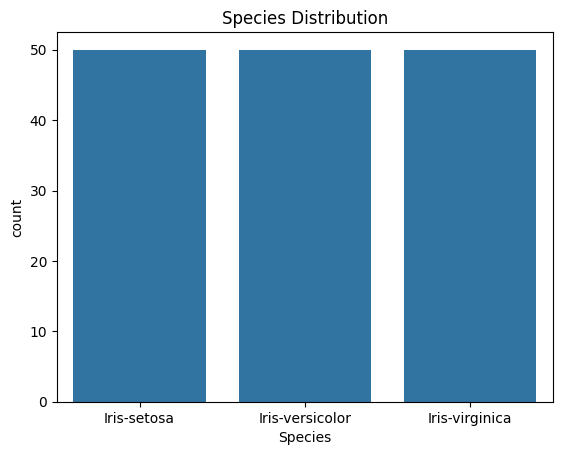

In [4]:
print(df['Species'].value_counts())
sns.countplot(x='Species', data=df)
plt.title('Species Distribution')
plt.show()

## 5. Feature Distributions

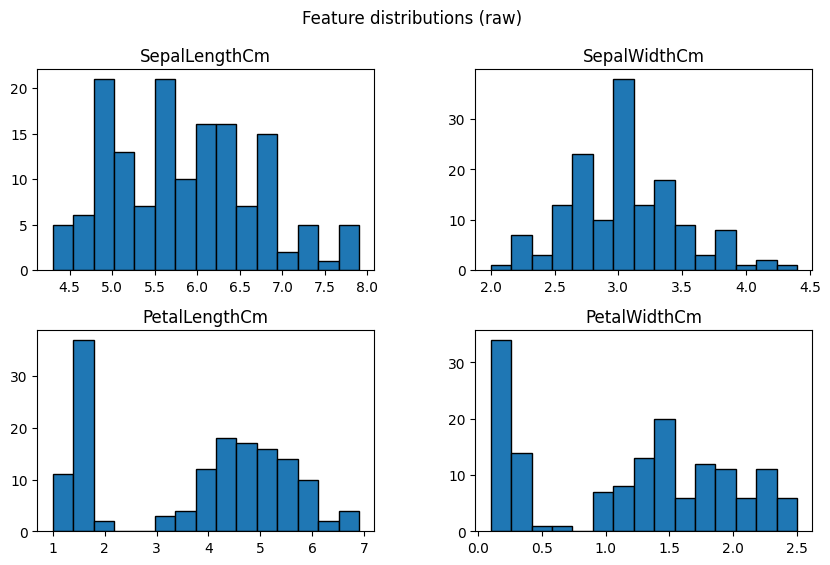

In [5]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df[features].hist(bins=15, layout=(2,2), figsize=(10,6), edgecolor='black', grid=False)
plt.suptitle('Feature distributions (raw)')
plt.show()

## 6. Feature vs Target Visualization

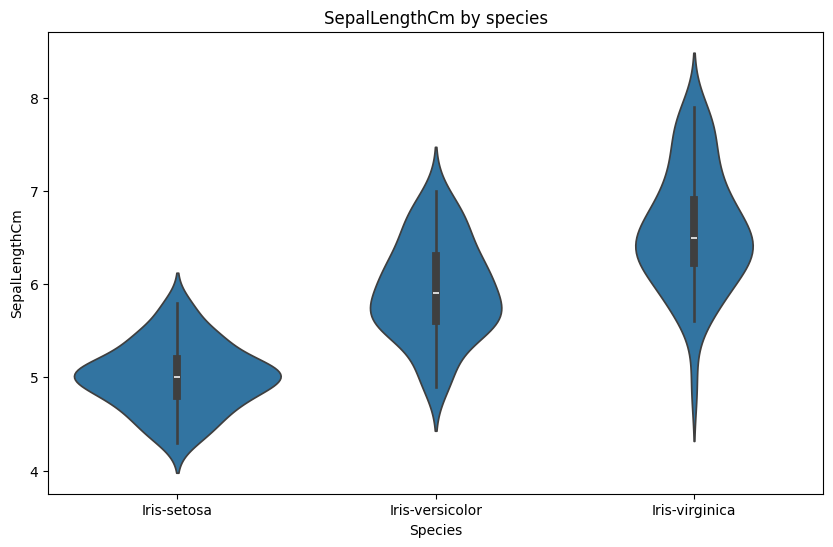

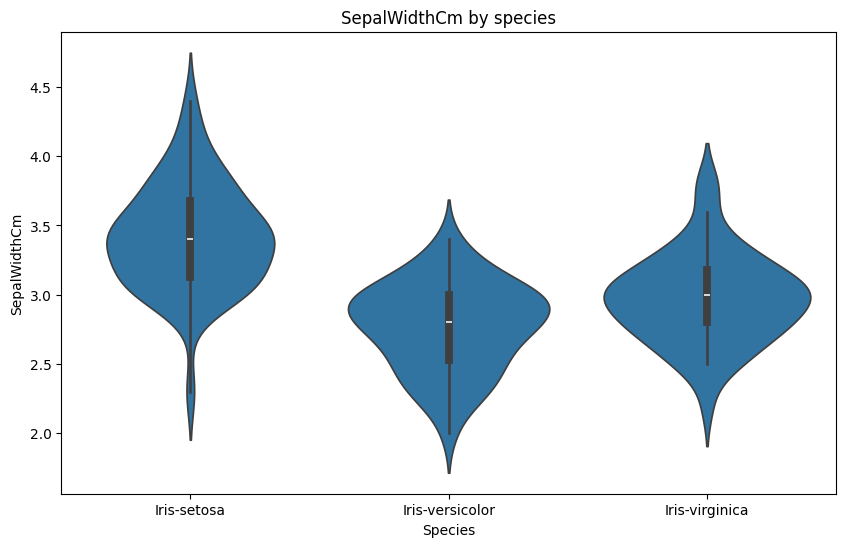

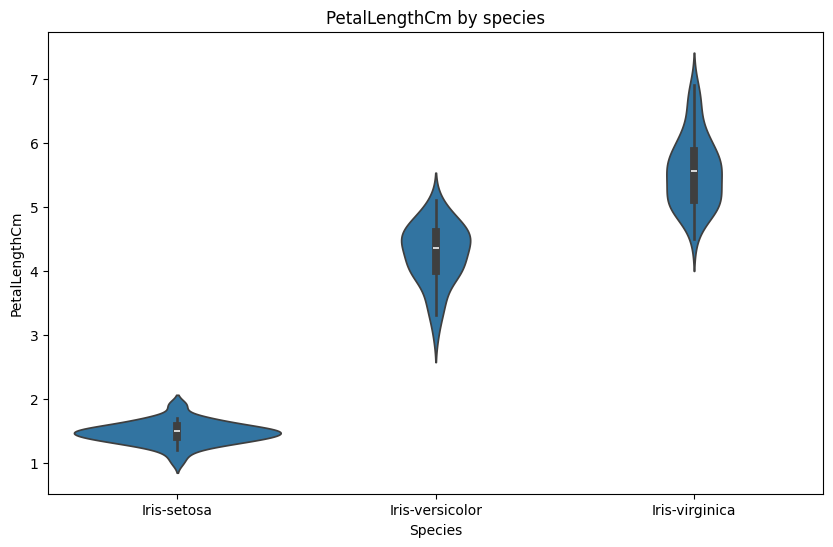

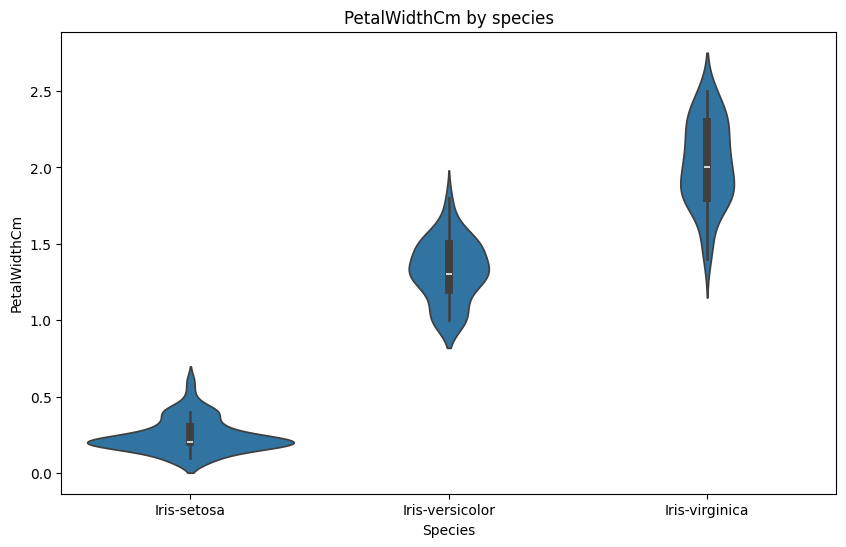

In [6]:
for f in features:
    plt.figure(figsize=(10,6))
    sns.violinplot(x='Species', y=f, data=df)
    plt.title(f"{f} by species")
    plt.show()

## 7. Pairwise Feature Relationships

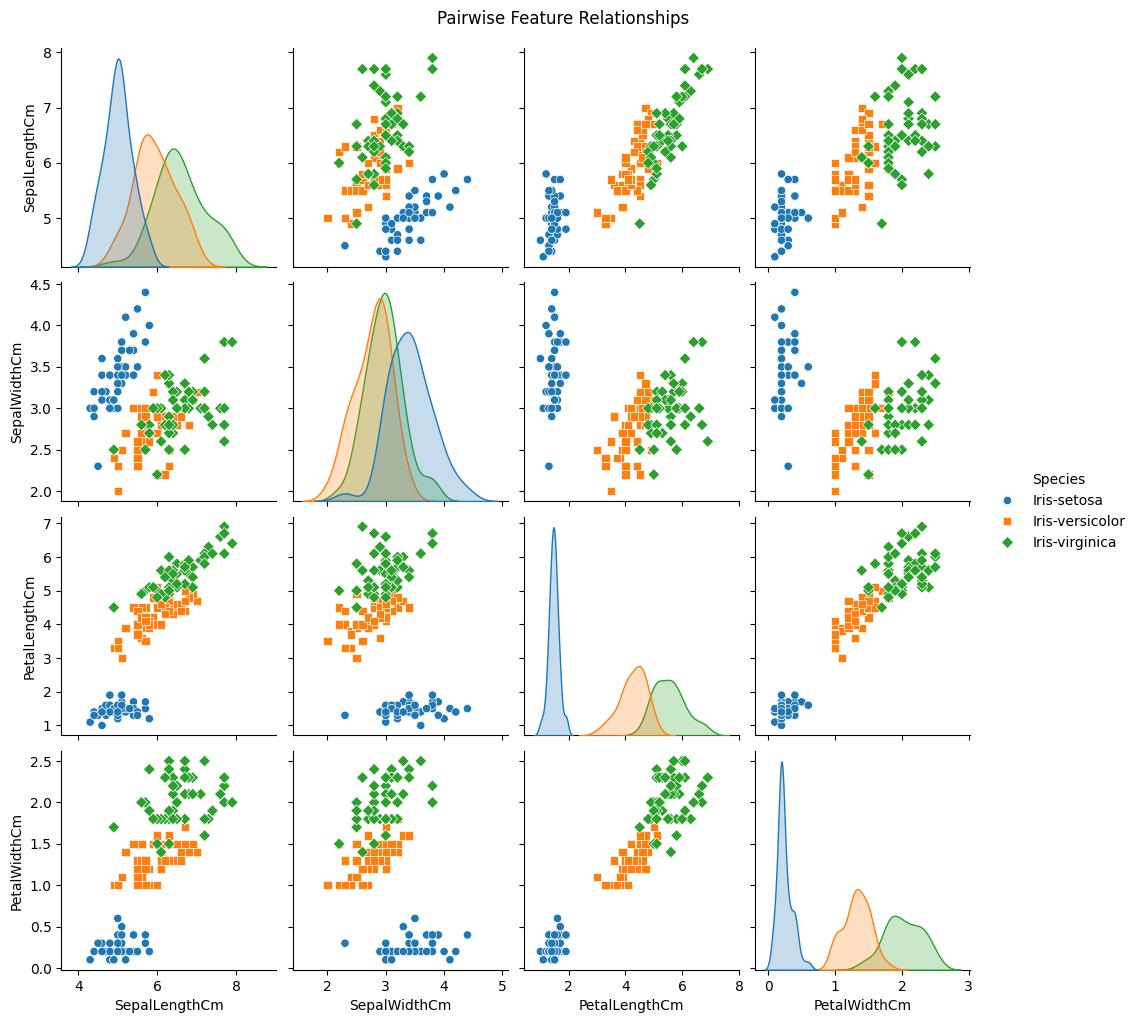

In [7]:
sns.pairplot(df.drop('Id', axis=1), hue='Species', diag_kind='kde', markers=["o", "s", "D"])
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

## 8. Feature Correlation

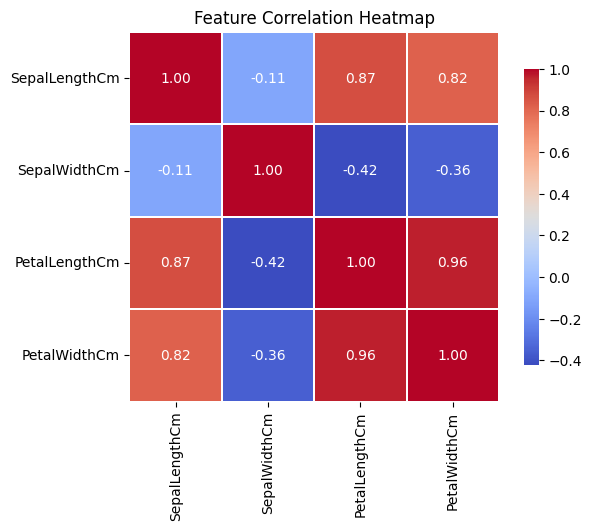

In [8]:
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.2)
plt.title('Feature Correlation Heatmap')
plt.show()


## 9. Feature Correlation by Species

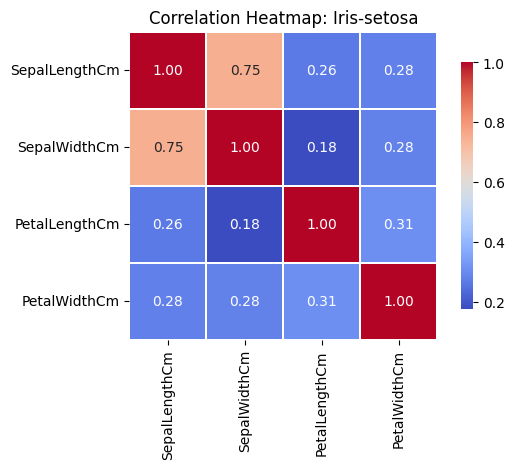

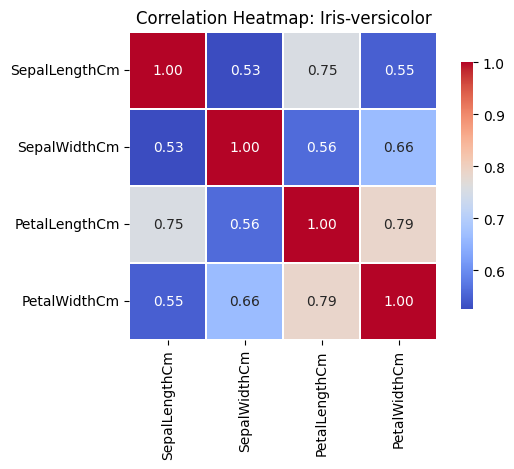

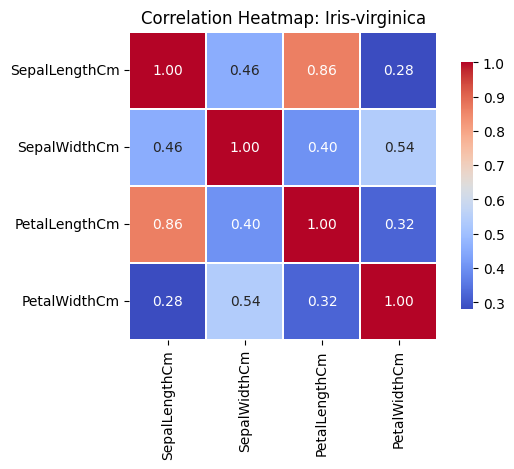

In [9]:
for specie in df['Species'].unique():
    corr = df[df['Species'] == specie][features].corr()
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8}, linewidths=0.2)
    plt.title(f'Correlation Heatmap: {specie}')
    plt.show()

## 10. Conclusion

This exploratory data analysis of the Iris dataset provided valuable insights into the structure and relationships of the data:

- The dataset is balanced across species, with no missing values or significant duplicates.
- Feature distributions show clear separation between species, especially for petal measurements.
- Pairwise plots and correlation heatmaps reveal strong positive relationships between petal length and petal width, while sepal width is less correlated with other features.
- Correlation analysis by species highlights that feature relationships can vary across classes, which is useful for model selection and feature engineering.

These findings suggest that petal features are highly informative for classification, and the dataset is well-suited for building predictive models. The next steps could include feature scaling, model training, and evaluation using these insights.